In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('energydata_complete.csv')
print(df.head())
print(df.tail())

                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility

In [5]:
print(df.describe())

         Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576    

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [7]:
df.rename(columns={'T1': 'kitchen_t', 
                   'RH_1': 'kitchen_h', 
                   'T2': 'lving_t',
                   'RH_2': 'living_h',
                   'T3': 'laundry_t',
                   'RH_3': 'laundry_h',
                   'T4': 'office_t',
                   'RH_4': 'office_h',
                   'T5': 'bathroom_t',
                   'RH_5': 'bathroom_h',
                   'T6': 'ns_t',
                   'RH_6': 'ns_h',
                   'T7': 'iron_t',
                   'RH_7': 'iron_h',
                   'T8': 'teen_t',
                   'RH_8': 'teen_h',
                   'T9': 'parent_t',
                   'RH_9': 'parent_h',
                   'T_out': 'outside_t',
                   'RH_out': 'outside_h',}, inplace=True)

df.columns

Index(['date', 'Appliances', 'lights', 'kitchen_t', 'kitchen_h', 'lving_t',
       'living_h', 'laundry_t', 'laundry_h', 'office_t', 'office_h',
       'bathroom_t', 'bathroom_h', 'ns_t', 'ns_h', 'iron_t', 'iron_h',
       'teen_t', 'teen_h', 'parent_t', 'parent_h', 'outside_t', 'Press_mm_hg',
       'outside_h', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [8]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%m-%d-%Y')
df = df.groupby('date').mean()
df.head(50)

,Appliances,lights,kitchen_t,kitchen_h,lving_t,living_h,laundry_t,laundry_h,office_t,office_h,...,parent_t,parent_h,outside_t,Press_mm_hg,outside_h,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
01-11-2016,136.666667,30.000000,20.808571,46.906210,20.153333,44.793175,20.140972,45.992440,19.492222,47.260813,...,16.918175,45.106210,5.922619,735.173810,89.285714,6.083333,40.845238,4.228571,26.248800,26.248800
01-12-2016,85.694444,4.236111,20.092326,45.142014,19.307655,43.779733,19.993646,44.933171,19.772778,44.556840,...,17.032847,45.680127,5.566319,742.628125,87.500000,5.784722,37.229167,3.596528,25.505072,25.505072
01-13-2016,97.013889,5.416667,19.197824,42.867772,18.568513,42.119669,19.609213,43.720891,19.009803,42.315174,...,16.953576,44.691476,4.856944,754.790625,83.406250,5.614583,31.559028,2.169792,23.464726,23.464726
01-14-2016,151.388889,5.000000,20.372078,42.435191,19.743131,40.699172,20.837581,43.399740,18.694271,43.231053,...,16.884815,45.428229,3.431944,749.767361,86.420139,6.277778,35.149306,1.316667,25.264569,25.264569
01-15-2016,125.347222,5.972222,22.280949,39.099294,21.528172,38.193897,20.959074,41.409884,19.615127,41.961036,...,17.345694,44.534329,2.665278,754.579861,88.385417,7.770833,40.208333,0.849653,26.289515,26.289515
01-16-2016,125.277778,7.986111,22.119063,39.925671,21.235583,39.083364,21.022170,42.027425,20.533663,41.797853,...,17.896308,44.383391,2.194097,763.452778,89.649306,3.482639,35.486111,0.539931,24.912713,24.912713
01-17-2016,142.708333,4.930556,21.755984,39.448860,20.616855,38.153186,21.275428,40.717731,21.016771,39.240729,...,17.910133,41.414670,0.392708,764.744444,83.868056,2.208333,33.920139,-2.218403,24.431695,24.431695
01-18-2016,93.958333,3.402778,20.086852,40.861522,18.695812,40.927661,20.001400,40.861846,19.539740,38.199196,...,17.288241,39.009219,-2.937847,758.843403,82.225694,2.357639,30.069444,-5.645139,24.603728,24.603728
01-19-2016,83.263889,2.708333,19.264641,39.716898,17.980556,39.999439,19.395249,40.027286,18.521933,37.666059,...,16.689560,38.970359,-2.929167,757.250694,83.704861,1.000000,49.538194,-5.480208,23.631839,23.631839


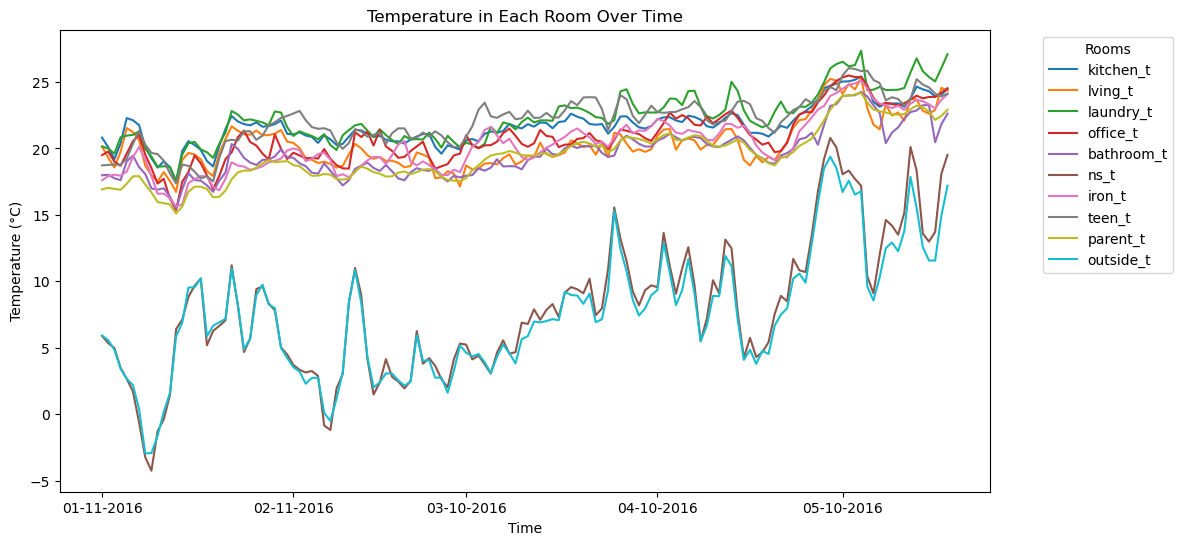

In [9]:
import matplotlib.dates as mdates
roomst = ['kitchen_t', 'lving_t', 'laundry_t', 'office_t', 'bathroom_t', 'ns_t', 'iron_t', 'teen_t', 'parent_t', 'outside_t']
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
for room in roomst:
    plt.plot(df.index, df[room], label=room)

# Add labels and title
plt.xlabel('Time')  # Assuming your index is datetime
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Each Room Over Time')
plt.legend(title='Rooms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

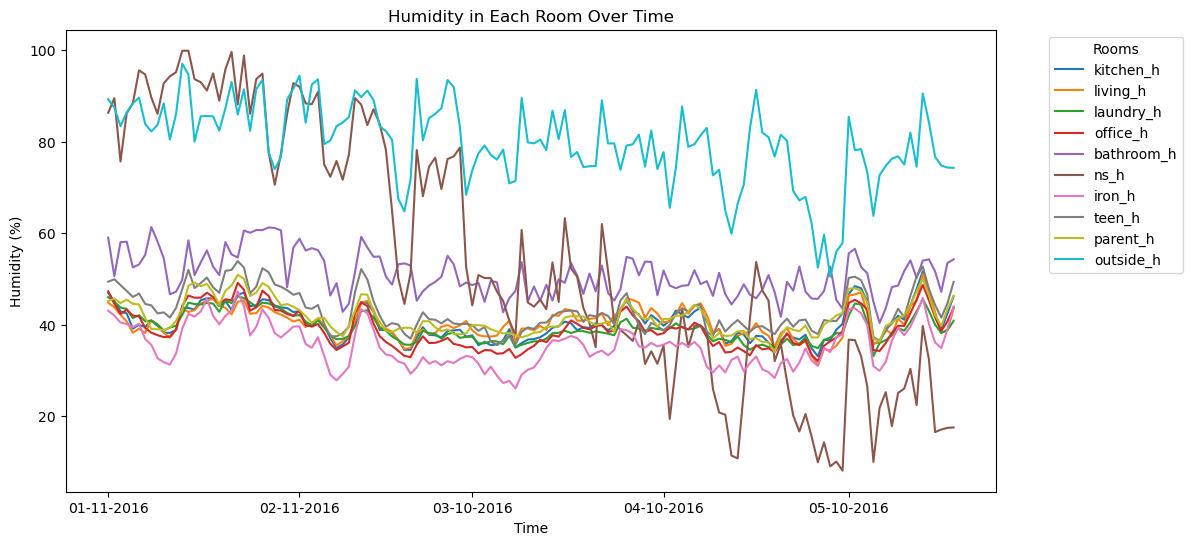

In [10]:
roomsh = ['kitchen_h', 'living_h', 'laundry_h', 'office_h', 'bathroom_h', 'ns_h', 'iron_h', 'teen_h', 'parent_h', 'outside_h']
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
for room in roomsh:
    plt.plot(df.index, df[room], label=room)

# Add labels and title
plt.xlabel('Time')  # Assuming your index is datetime
plt.ylabel('Humidity (%)')
plt.title('Humidity in Each Room Over Time')
plt.legend(title='Rooms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

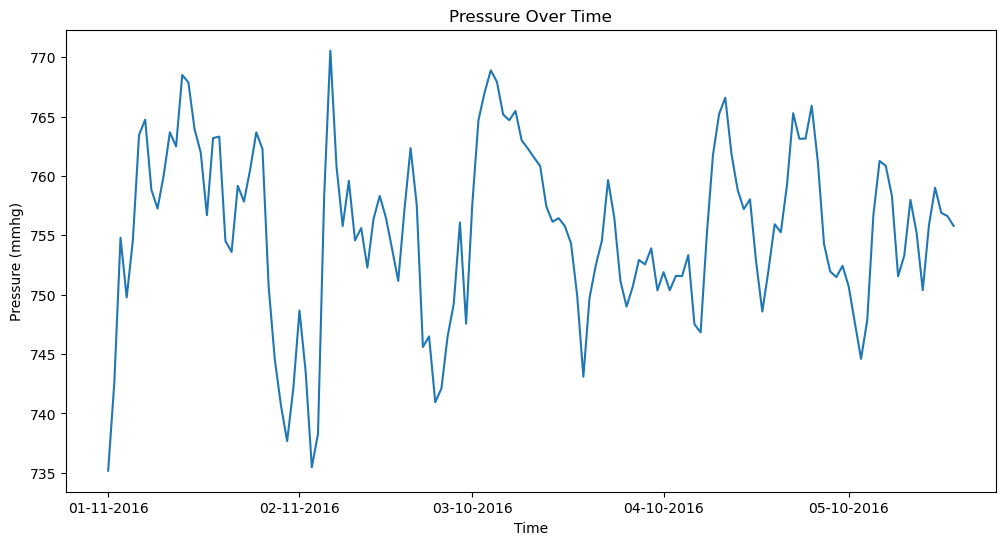

In [11]:
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.plot(df.index, df["Press_mm_hg"], label="Press_mm_hg")

# Add labels and title
plt.xlabel('Time')  # Assuming your index is datetime
plt.ylabel('Pressure (mmhg)')
plt.title('Pressure Over Time')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

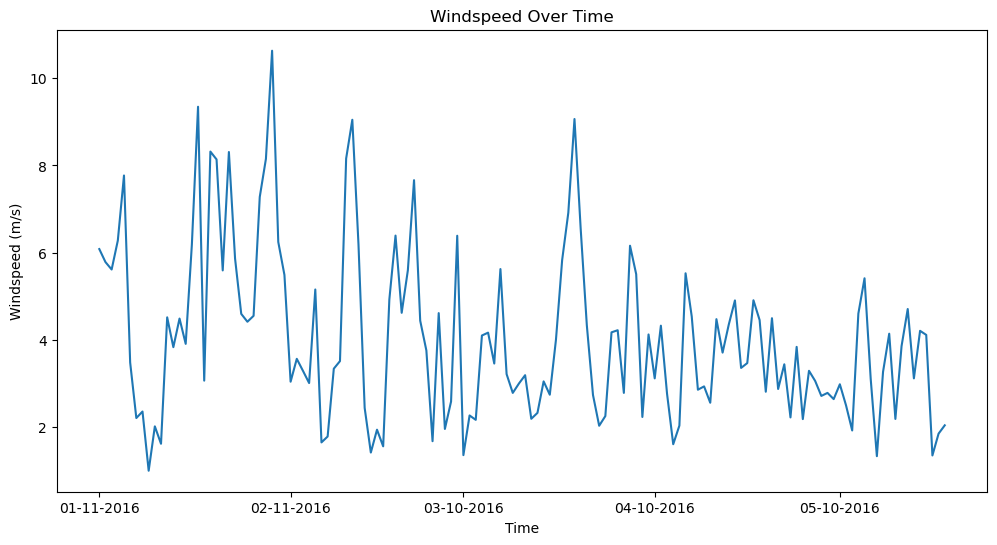

In [12]:
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.plot(df.index, df["Windspeed"], label="Windspeed")

# Add labels and title
plt.xlabel('Time')  # Assuming your index is datetime
plt.ylabel('Windspeed (m/s)')
plt.title('Windspeed Over Time')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

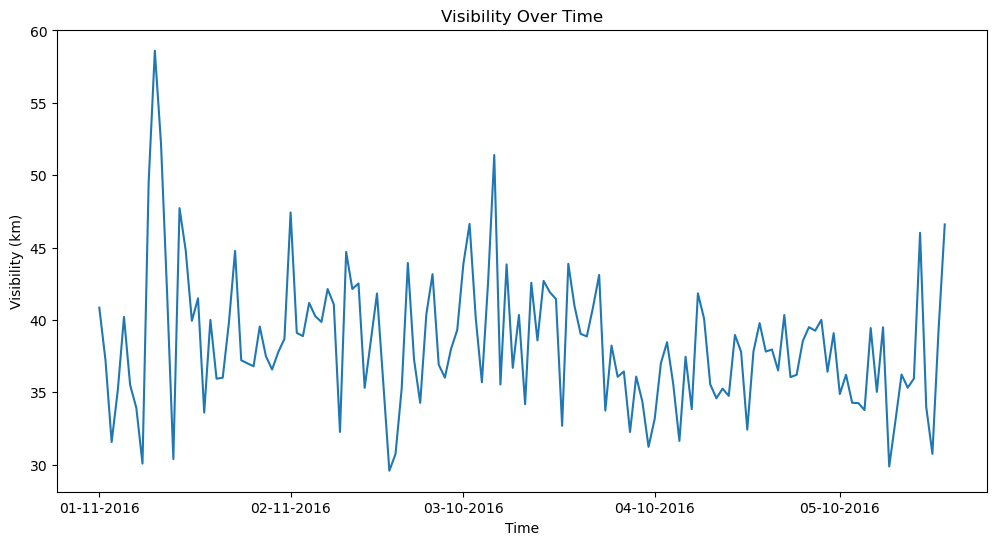

In [13]:
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.plot(df.index, df["Visibility"], label="Visibility")

# Add labels and title
plt.xlabel('Time')  # Assuming your index is datetime
plt.ylabel('Visibility (km)')
plt.title('Visibility Over Time')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

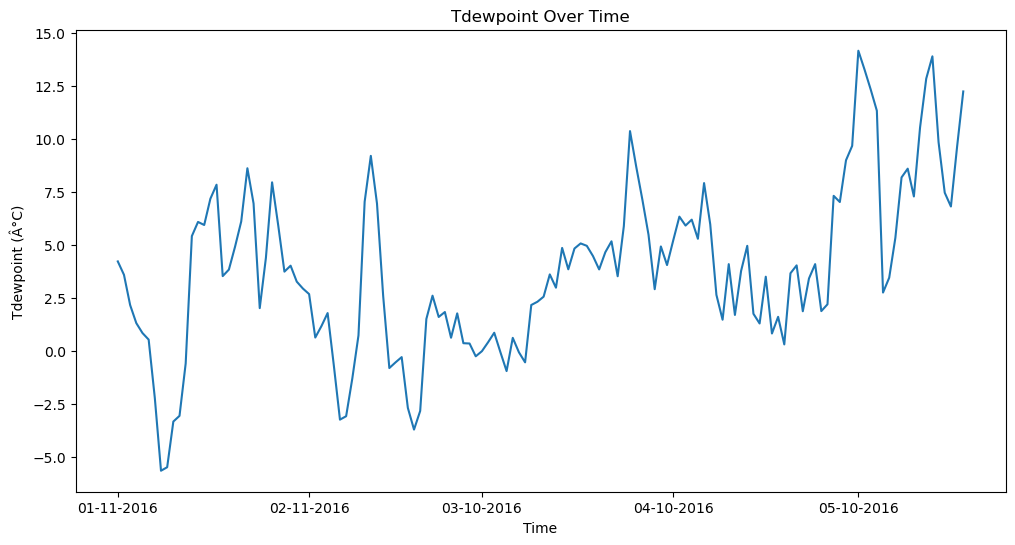

In [14]:
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.plot(df.index, df["Tdewpoint"], label="Tdewpoint")

# Add labels and title
plt.xlabel('Time')  # Assuming your index is datetime
plt.ylabel('Tdewpoint (Â°C)')
plt.title('Tdewpoint Over Time')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

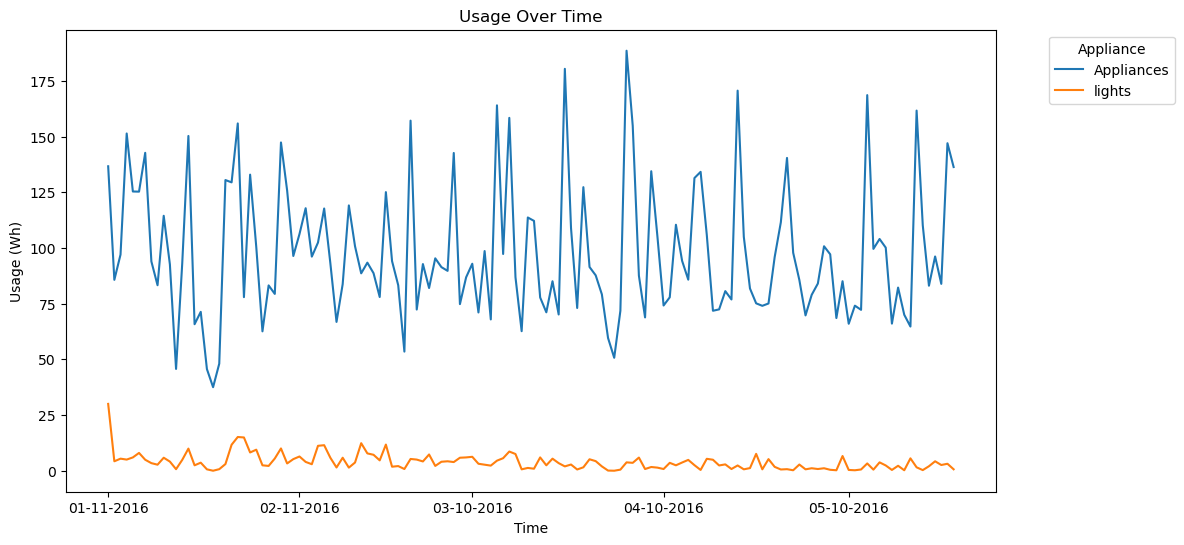

In [15]:
Apps = ['Appliances', 'lights']
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
for App in Apps:
    plt.plot(df.index, df[App], label=App)

# Add labels and title
plt.xlabel('Time')  # Assuming your index is datetime
plt.ylabel('Usage (Wh)')
plt.title('Usage Over Time')
plt.legend(title='Appliance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

In [16]:
df.columns

Index(['Appliances', 'lights', 'kitchen_t', 'kitchen_h', 'lving_t', 'living_h',
       'laundry_t', 'laundry_h', 'office_t', 'office_h', 'bathroom_t',
       'bathroom_h', 'ns_t', 'ns_h', 'iron_t', 'iron_h', 'teen_t', 'teen_h',
       'parent_t', 'parent_h', 'outside_t', 'Press_mm_hg', 'outside_h',
       'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

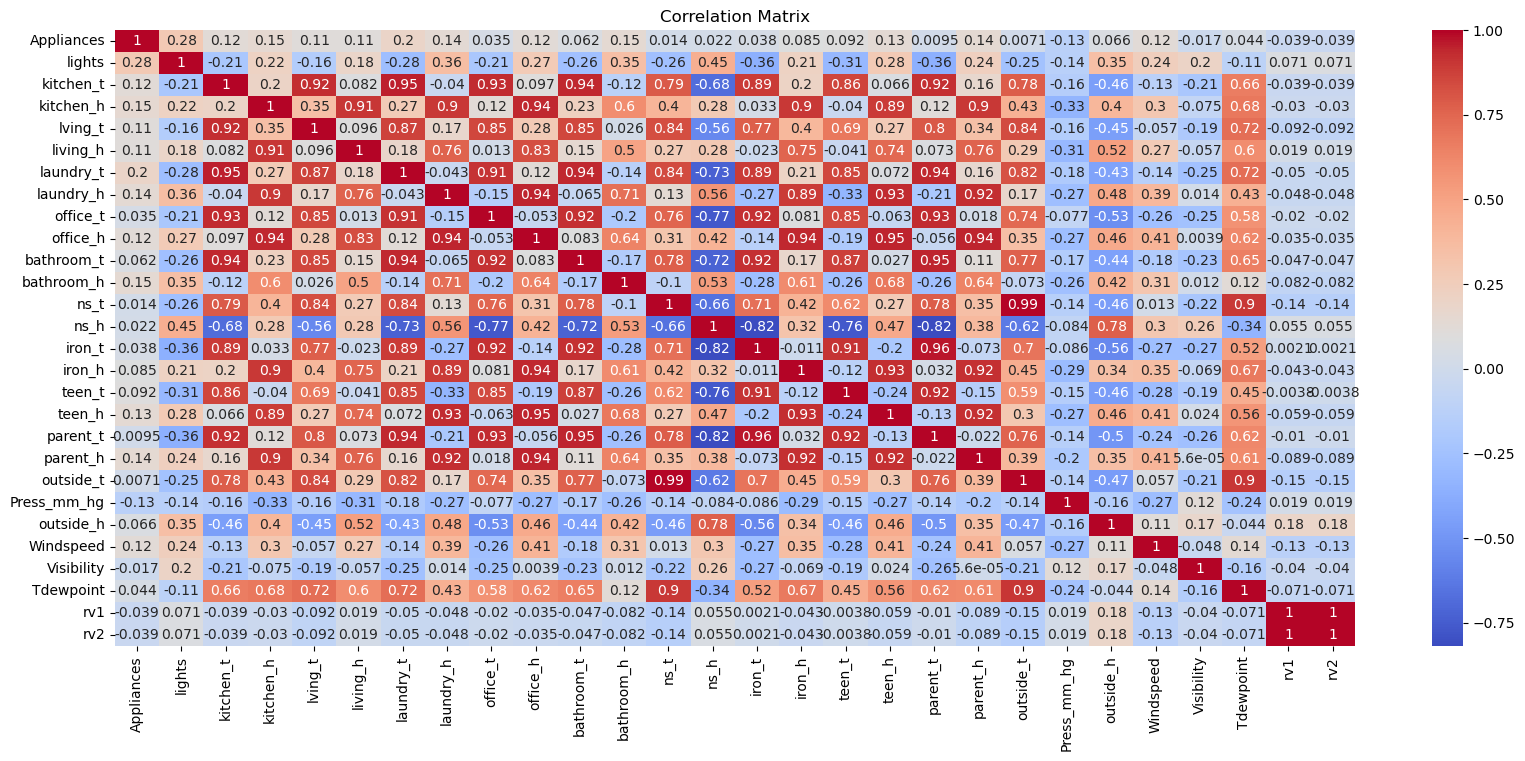

In [21]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [23]:
from sklearn.feature_selection import SelectKBest, f_regression
X = df.drop(columns=['Appliances'])
y = df['Appliances']

selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, y)
scores = selector.scores_

feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
print(feature_scores.sort_values(by='Score', ascending=False))

        Feature      Score
0        lights  11.967477
5     laundry_t   5.377682
2     kitchen_h   3.174709
10   bathroom_h   2.945464
18     parent_h   2.864957
6     laundry_h   2.545172
16       teen_h   2.508982
20  Press_mm_hg   2.255863
1     kitchen_t   2.140922
8      office_h   2.091832
22    Windspeed   2.050043
3       lving_t   1.622546
4      living_h   1.588312
15       teen_t   1.150537
14       iron_h   0.985345
21    outside_h   0.591887
9    bathroom_t   0.520976
24    Tdewpoint   0.260450
25          rv1   0.211224
26          rv2   0.211224
13       iron_t   0.198231
7      office_t   0.171305
12         ns_h   0.066414
23   Visibility   0.037989
11         ns_t   0.026601
17     parent_t   0.012396
19    outside_t   0.006877


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 20.366370841681967
RMSE: 23.59839191896161


In [25]:
import statsmodels.api as sm

X = sm.add_constant(X)

model1 = sm.OLS(y,X).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             Appliances   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     5.375
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           1.62e-10
Time:                        16:51:22   Log-Likelihood:                -610.60
No. Observations:                 138   AIC:                             1275.
Df Residuals:                     111   BIC:                             1354.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -194.2731    400.615     -0.485      